## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [186]:
import zipfile
import csv
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Your code here - remember to use markdown cells for comments as well!
with zipfile.ZipFile('./zippedData/im.db.zip') as zipObj:
    zipObj.extractall(path='./zippedData/')
    
con = sqlite3.connect('./zippedData/im.db')

In [11]:
person = pd.read_sql("""
SELECT *
FROM persons;
""", con)
person

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [12]:
principals=pd.read_sql("""
SELECT *
FROM principals;
""", con)
principals

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


In [13]:
movie_info = pd.read_csv('./zippedData/rt.movie_info.tsv.gz',sep="\t")

In [14]:
reviews = pd.read_csv('./zippedData/rt.reviews.tsv.gz',sep="\t", encoding = 'unicode_escape')

In [15]:
movie_gross = pd.read_csv('./zippedData/bom.movie_gross.csv.gz')

In [16]:
tmdb = pd.read_csv('./zippedData/tmdb.movies.csv.gz')

In [17]:
budgets = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')

In [18]:
budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [19]:
budgets['release_year'] = budgets['release_date'].str[-4:12]
budgets['release_year'] = budgets['release_year'].astype(int)

In [20]:
budgets = budgets.sort_values('release_year')
budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
5677,78,"Feb 8, 1915",The Birth of a Nation,"$110,000","$10,000,000","$11,000,000",1915
5523,24,"Sep 5, 1916",Intolerance,"$385,907",$0,$0,1916
5614,15,"Dec 24, 1916","20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000",1916
5683,84,"Sep 17, 1920",Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000",1920
4569,70,"Dec 30, 1925",Ben-Hur: A Tale of the Christ,"$3,900,000","$9,000,000","$9,000,000",1925
...,...,...,...,...,...,...,...
2292,93,"Jan 25, 2019",Serenity,"$25,000,000","$8,547,045","$11,367,029",2019
4135,36,"Feb 8, 2019",The Prodigy,"$6,000,000","$14,856,291","$19,789,712",2019
1205,6,"Dec 31, 2020",Hannibal the Conqueror,"$50,000,000",$0,$0,2020
194,95,"Dec 31, 2020",Moonfall,"$150,000,000",$0,$0,2020


In [28]:
#had to replace the str values first and then turn it into an int, after its an int had to remove the .str before replace
#for the cell to run properly after the first run. 
budgets['production_budget'] = budgets['production_budget'].replace("$", "")
budgets['production_budget'] = budgets['production_budget'].replace(",", "")
budgets['production_budget'] = budgets['production_budget'].astype(int)
budgets = budgets.sort_values('production_budget')
budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
5781,82,"Aug 5, 2005",My Date With Drew,1100,181041,1.810410e+05,2005
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0.000000e+00,2015
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1.338000e+03,2005
5778,79,"Apr 2, 1999",Following,6000,48482,2.404950e+05,1999
5773,74,"Feb 26, 1993",El Mariachi,7000,2040920,2.041928e+06,1993
...,...,...,...,...,...,...,...
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1.316722e+09,2017
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.403014e+09,2015
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,1.497624e+08,2019
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,2011


In [29]:
#had to replace the str values first and then turn it into an int, after its an int had to remove the .str before replace
#for the cell to run properly
budgets['domestic_gross'] = budgets['domestic_gross'].replace("$", "")
budgets['domestic_gross'] = budgets['domestic_gross'].replace(",", "")
budgets['domestic_gross'] = budgets['domestic_gross'].astype(int)
budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
5781,82,"Aug 5, 2005",My Date With Drew,1100,181041,1.810410e+05,2005
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0.000000e+00,2015
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1.338000e+03,2005
5778,79,"Apr 2, 1999",Following,6000,48482,2.404950e+05,1999
5773,74,"Feb 26, 1993",El Mariachi,7000,2040920,2.041928e+06,1993
...,...,...,...,...,...,...,...
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1.316722e+09,2017
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.403014e+09,2015
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,1.497624e+08,2019
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,2011


In [177]:
#had to replace the str values first and then turn it into an int, after its an int had to remove the .str before replace
#for the cell to run properly
budgets['worldwide_gross'] = budgets['worldwide_gross'].replace("$", "")
budgets['worldwide_gross'] = budgets['worldwide_gross'].replace(",", "")
budgets['worldwide_gross'] = budgets['worldwide_gross'].replace("-", "")
budgets['worldwide_gross'] = budgets['worldwide_gross'].astype(int)
budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
5781,82,"Aug 5, 2005",My Date With Drew,1100,181041,181041,2005
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,2005
5778,79,"Apr 2, 1999",Following,6000,48482,240495,1999
5773,74,"Feb 26, 1993",El Mariachi,7000,2040920,2041928,1993
5776,77,"Dec 31, 2004",The Mongol King,7000,900,900,2004
...,...,...,...,...,...,...,...
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011


In [178]:
budgets = budgets[budgets['domestic_gross'] != 0]
budgets_fix = budgets.query('50000000 <= production_budget <= 250000000')
budgets_fix

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
1204,5,"Oct 2, 2015",Shanghai,50000000,46425,15505922,2015
1172,73,"Aug 9, 1996",Escape from L.A.,50000000,25426861,25426861,1996
1201,2,"Apr 17, 2015",Child 44,50000000,1224330,8004221,2015
1143,44,"Jul 29, 1998",The Negotiator,50000000,44705766,49105766,1998
1193,94,"Oct 14, 2005",Domino,50000000,10169202,23574057,2005
...,...,...,...,...,...,...,...
18,19,"Dec 14, 2012",The Hobbit: An Unexpected Journey,250000000,303003568,1017003568,2012
17,18,"Mar 25, 2016",Batman v Superman: Dawn of Justice,250000000,330360194,867500281,2016
22,23,"Apr 14, 2017",The Fate of the Furious,250000000,225764765,1234846267,2017
16,17,"May 6, 2016",Captain America: Civil War,250000000,408084349,1140069413,2016


In [179]:
budgets_new = budgets_fix[budgets_fix['release_year'] >= 2005]
budgets_new

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
1204,5,"Oct 2, 2015",Shanghai,50000000,46425,15505922,2015
1201,2,"Apr 17, 2015",Child 44,50000000,1224330,8004221,2015
1193,94,"Oct 14, 2005",Domino,50000000,10169202,23574057,2005
1185,86,"Sep 30, 2005",Into the Blue,50000000,18782227,41982227,2005
1182,83,"Feb 25, 2005",Man of the House,50000000,19699706,22099706,2005
...,...,...,...,...,...,...,...
18,19,"Dec 14, 2012",The Hobbit: An Unexpected Journey,250000000,303003568,1017003568,2012
17,18,"Mar 25, 2016",Batman v Superman: Dawn of Justice,250000000,330360194,867500281,2016
22,23,"Apr 14, 2017",The Fate of the Furious,250000000,225764765,1234846267,2017
16,17,"May 6, 2016",Captain America: Civil War,250000000,408084349,1140069413,2016


In [180]:
budgets_old = budgets_fix[budgets_fix['release_year'] < 2005]
budgets_old

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
1172,73,"Aug 9, 1996",Escape from L.A.,50000000,25426861,25426861,1996
1143,44,"Jul 29, 1998",The Negotiator,50000000,44705766,49105766,1998
1116,17,"Nov 24, 2004",Christmas with the Kranks,50000000,73701902,96469187,2004
1086,87,"Dec 13, 1996",Jerry Maguire,50000000,153952592,274000000,1996
1109,10,"Feb 5, 1999",Payback,50000000,81526121,161626121,1999
...,...,...,...,...,...,...,...
119,20,"Jul 1, 2003",Terminator 3: Rise of the Machines,170000000,150358296,433058296,2003
109,10,"Jul 28, 1995",Waterworld,175000000,88246220,264246220,1995
106,7,"Jun 30, 1999",Wild Wild West,175000000,113805681,221229335,1999
42,43,"Dec 19, 1997",Titanic,200000000,659363944,-2147483648,1997


In [181]:
budgets_fix.describe()

,id,production_budget,domestic_gross,worldwide_gross,release_year
count,1178.000000,1.178000e+03,1.178000e+03,1.178000e+03,1178.000000
mean,50.831919,9.296448e+07,1.084602e+08,2.669016e+08,2007.046689
std,28.777982,4.406575e+07,9.725489e+07,2.673440e+08,7.056781
min,1.000000,5.000000e+07,3.276600e+04,-2.147484e+09,1978.000000
25%,26.000000,6.000000e+07,4.166188e+07,9.049991e+07,2002.000000
50%,51.000000,7.915000e+07,7.868380e+07,1.833540e+08,2007.000000
75%,76.000000,1.131250e+08,1.413010e+08,3.513851e+08,2013.000000
max,100.000000,2.500000e+08,7.000596e+08,1.648855e+09,2019.000000


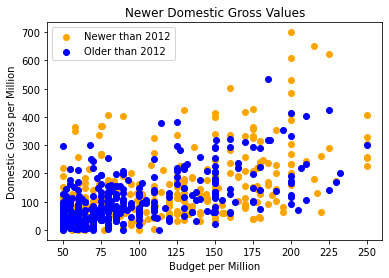

In [218]:
new_domestic, ax = plt.subplots()

x = budgets_new['production_budget']
y = budgets_new['domestic_gross']

plt.title('Newer Domestic Gross Values')
plt.xlabel('Budget per Million')
plt.ylabel('Domestic Gross per Million')

def format_number(data_value, idx):
    formatter = '{:1.0f}'.format(data_value*0.000001)
    return formatter

def format_numbery(data_value, idx):
    formatter = '{:1.0f}'.format(data_value*0.000001)
    return formatter

plt.xticks(np.arange(0,250_000_001, 25_000_000))
ax.xaxis.set_major_formatter(format_number)

plt.yticks(np.arange(0,2_000_000_001, 100_000_000))
ax.yaxis.set_major_formatter(format_numbery)
           
ax.scatter(x[budgets_new['release_year'] >= 2012], y[budgets_new['release_year'] >= 2012], color='orange', label='Newer than 2012');
ax.scatter(x[budgets_new['release_year'] < 2012], y[budgets_new['release_year'] < 2012], color='blue', label='Older than 2012');

ax.legend()
plt.savefig('new_domestic.png', dpi = 400)

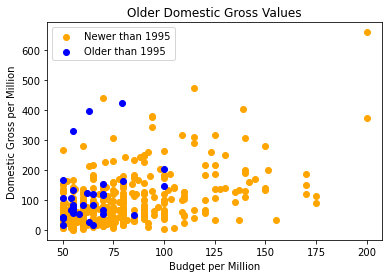

In [215]:
old_domestic, ax = plt.subplots()

plt.title('Older Domestic Gross Values')
plt.xlabel('Budget per Million')
plt.ylabel('Domestic Gross per Million')

plt.xticks(np.arange(0,250_000_001, 25_000_000))
ax.xaxis.set_major_formatter(format_number)

plt.yticks(np.arange(0,2_000_000_001, 100_000_000))
ax.yaxis.set_major_formatter(format_numbery)

x = budgets_old['production_budget']
y = budgets_old['domestic_gross']

ax.scatter(x[budgets_old['release_year'] >= 1995], y[budgets_old['release_year'] >= 1995], color='orange', label='Newer than 1995');
ax.scatter(x[budgets_old['release_year'] < 1995], y[budgets_old['release_year'] < 1995], color='blue', label='Older than 1995');

ax.legend()
plt.savefig('old_domestic.png', dpi = 400)

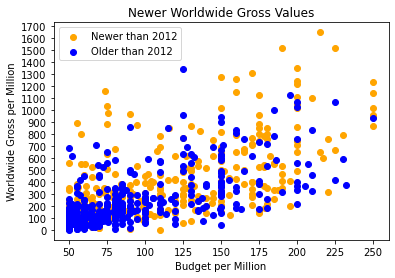

In [217]:
new_worldwide, ax = plt.subplots()

plt.title('Newer Worldwide Gross Values')
plt.xlabel('Budget per Million')
plt.ylabel('Worldwide Gross per Million')

plt.xticks(np.arange(0,250_000_001, 25_000_000))
ax.xaxis.set_major_formatter(format_number)

plt.yticks(np.arange(0,2_000_000_001, 100_000_000))
ax.yaxis.set_major_formatter(format_numbery)

x = budgets_new['production_budget']
y = budgets_new['worldwide_gross']

ax.scatter(x[budgets_new['release_year'] >= 2012], y[budgets_new['release_year'] >= 2012], color='orange',label='Newer than 2012');
ax.scatter(x[budgets_new['release_year'] < 2012], y[budgets_new['release_year'] < 2012], color='blue', label='Older than 2012');

ax.legend()
plt.savefig('new_worldwide.png', dpi = 400)

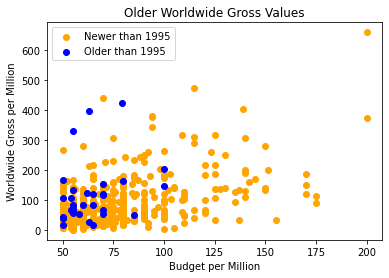

In [210]:
old_worldwide, ax = plt.subplots()

plt.title('Older Worldwide Gross Values')
plt.xlabel('Budget per Million')
plt.ylabel('Worldwide Gross per Million')

plt.xticks(np.arange(0,250_000_001, 25_000_000))
ax.xaxis.set_major_formatter(format_number)

plt.yticks(np.arange(0,2_000_000_001, 100_000_000))
ax.yaxis.set_major_formatter(format_numbery)

x = budgets_old['production_budget']
y = budgets_old['domestic_gross']

ax.scatter(x[budgets_old['release_year'] >= 1995], y[budgets_old['release_year'] >= 1995], color='orange', label='Newer than 1995');
ax.scatter(x[budgets_old['release_year'] < 1995], y[budgets_old['release_year'] < 1995], color='blue', label='Older than 1995');

ax.legend()
plt.savefig('old_worldwide.png', dpi = 400)